In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pygal_maps_world.maps import World
import pygal

In [2]:
df = pd.read_csv('14_Climate-related_Disasters_Frequency.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              970 non-null    object 
 1   ISO2                 944 non-null    object 
 2   ISO3                 970 non-null    object 
 3   Indicator            970 non-null    object 
 4   Unit                 970 non-null    object 
 5   Source               970 non-null    object 
 6   CTS Code             970 non-null    object 
 7   CTS Name             970 non-null    object 
 8   CTS Full Descriptor  970 non-null    object 
 9   1980                 139 non-null    float64
 10  1981                 141 non-null    float64
 11  1982                 125 non-null    float64
 12  1983                 178 non-null    float64
 13  1984                 132 non-null    float64
 14  1985                 143 non-null    float64
 15  1986                 131 non-null    flo

In [3]:
country_code_dict = dict(zip(df['Country'], df['ISO2'].apply(lambda x: str(x).lower())))

In [4]:
drop_column = ['ISO2','ISO3','Unit','Source','CTS Code','CTS Name','CTS Full Descriptor']
df.drop(drop_column, axis=1, inplace=True)

In [5]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    970 non-null    object 
 1   Indicator  970 non-null    object 
 2   1980       970 non-null    float64
 3   1981       970 non-null    float64
 4   1982       970 non-null    float64
 5   1983       970 non-null    float64
 6   1984       970 non-null    float64
 7   1985       970 non-null    float64
 8   1986       970 non-null    float64
 9   1987       970 non-null    float64
 10  1988       970 non-null    float64
 11  1989       970 non-null    float64
 12  1990       970 non-null    float64
 13  1991       970 non-null    float64
 14  1992       970 non-null    float64
 15  1993       970 non-null    float64
 16  1994       970 non-null    float64
 17  1995       970 non-null    float64
 18  1996       970 non-null    float64
 19  1997       970 non-null    float64
 20  1998      

In [114]:
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,...,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,0.214433,0.230928,0.247423,0.323711,0.241237,0.268041,0.249485,0.331959,0.352577,0.288660,...,0.610309,0.597938,0.729897,0.606186,0.649485,0.591753,0.744330,0.769072,0.806186,0.715464
std,0.722196,0.788378,0.994629,0.946644,0.904952,0.992391,0.881893,1.007254,1.310991,1.135402,...,2.042049,1.939007,2.163882,1.947071,1.845091,1.646942,1.758539,2.039920,2.404322,1.859755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,12.000000,13.000000,10.000000,14.000000,15.000000,10.000000,12.000000,22.000000,17.000000,...,34.000000,33.000000,31.000000,30.000000,26.000000,23.000000,20.000000,26.000000,43.000000,25.000000


In [6]:
df['Indicator'] = df['Indicator'].apply(lambda x: x.split(':')[1][1:])
indicator = df['Indicator'].unique()

In [7]:
indicator

array(['Drought', 'Extreme temperature', 'Flood', 'Landslide', 'Storm',
       'TOTAL', 'Wildfire'], dtype=object)

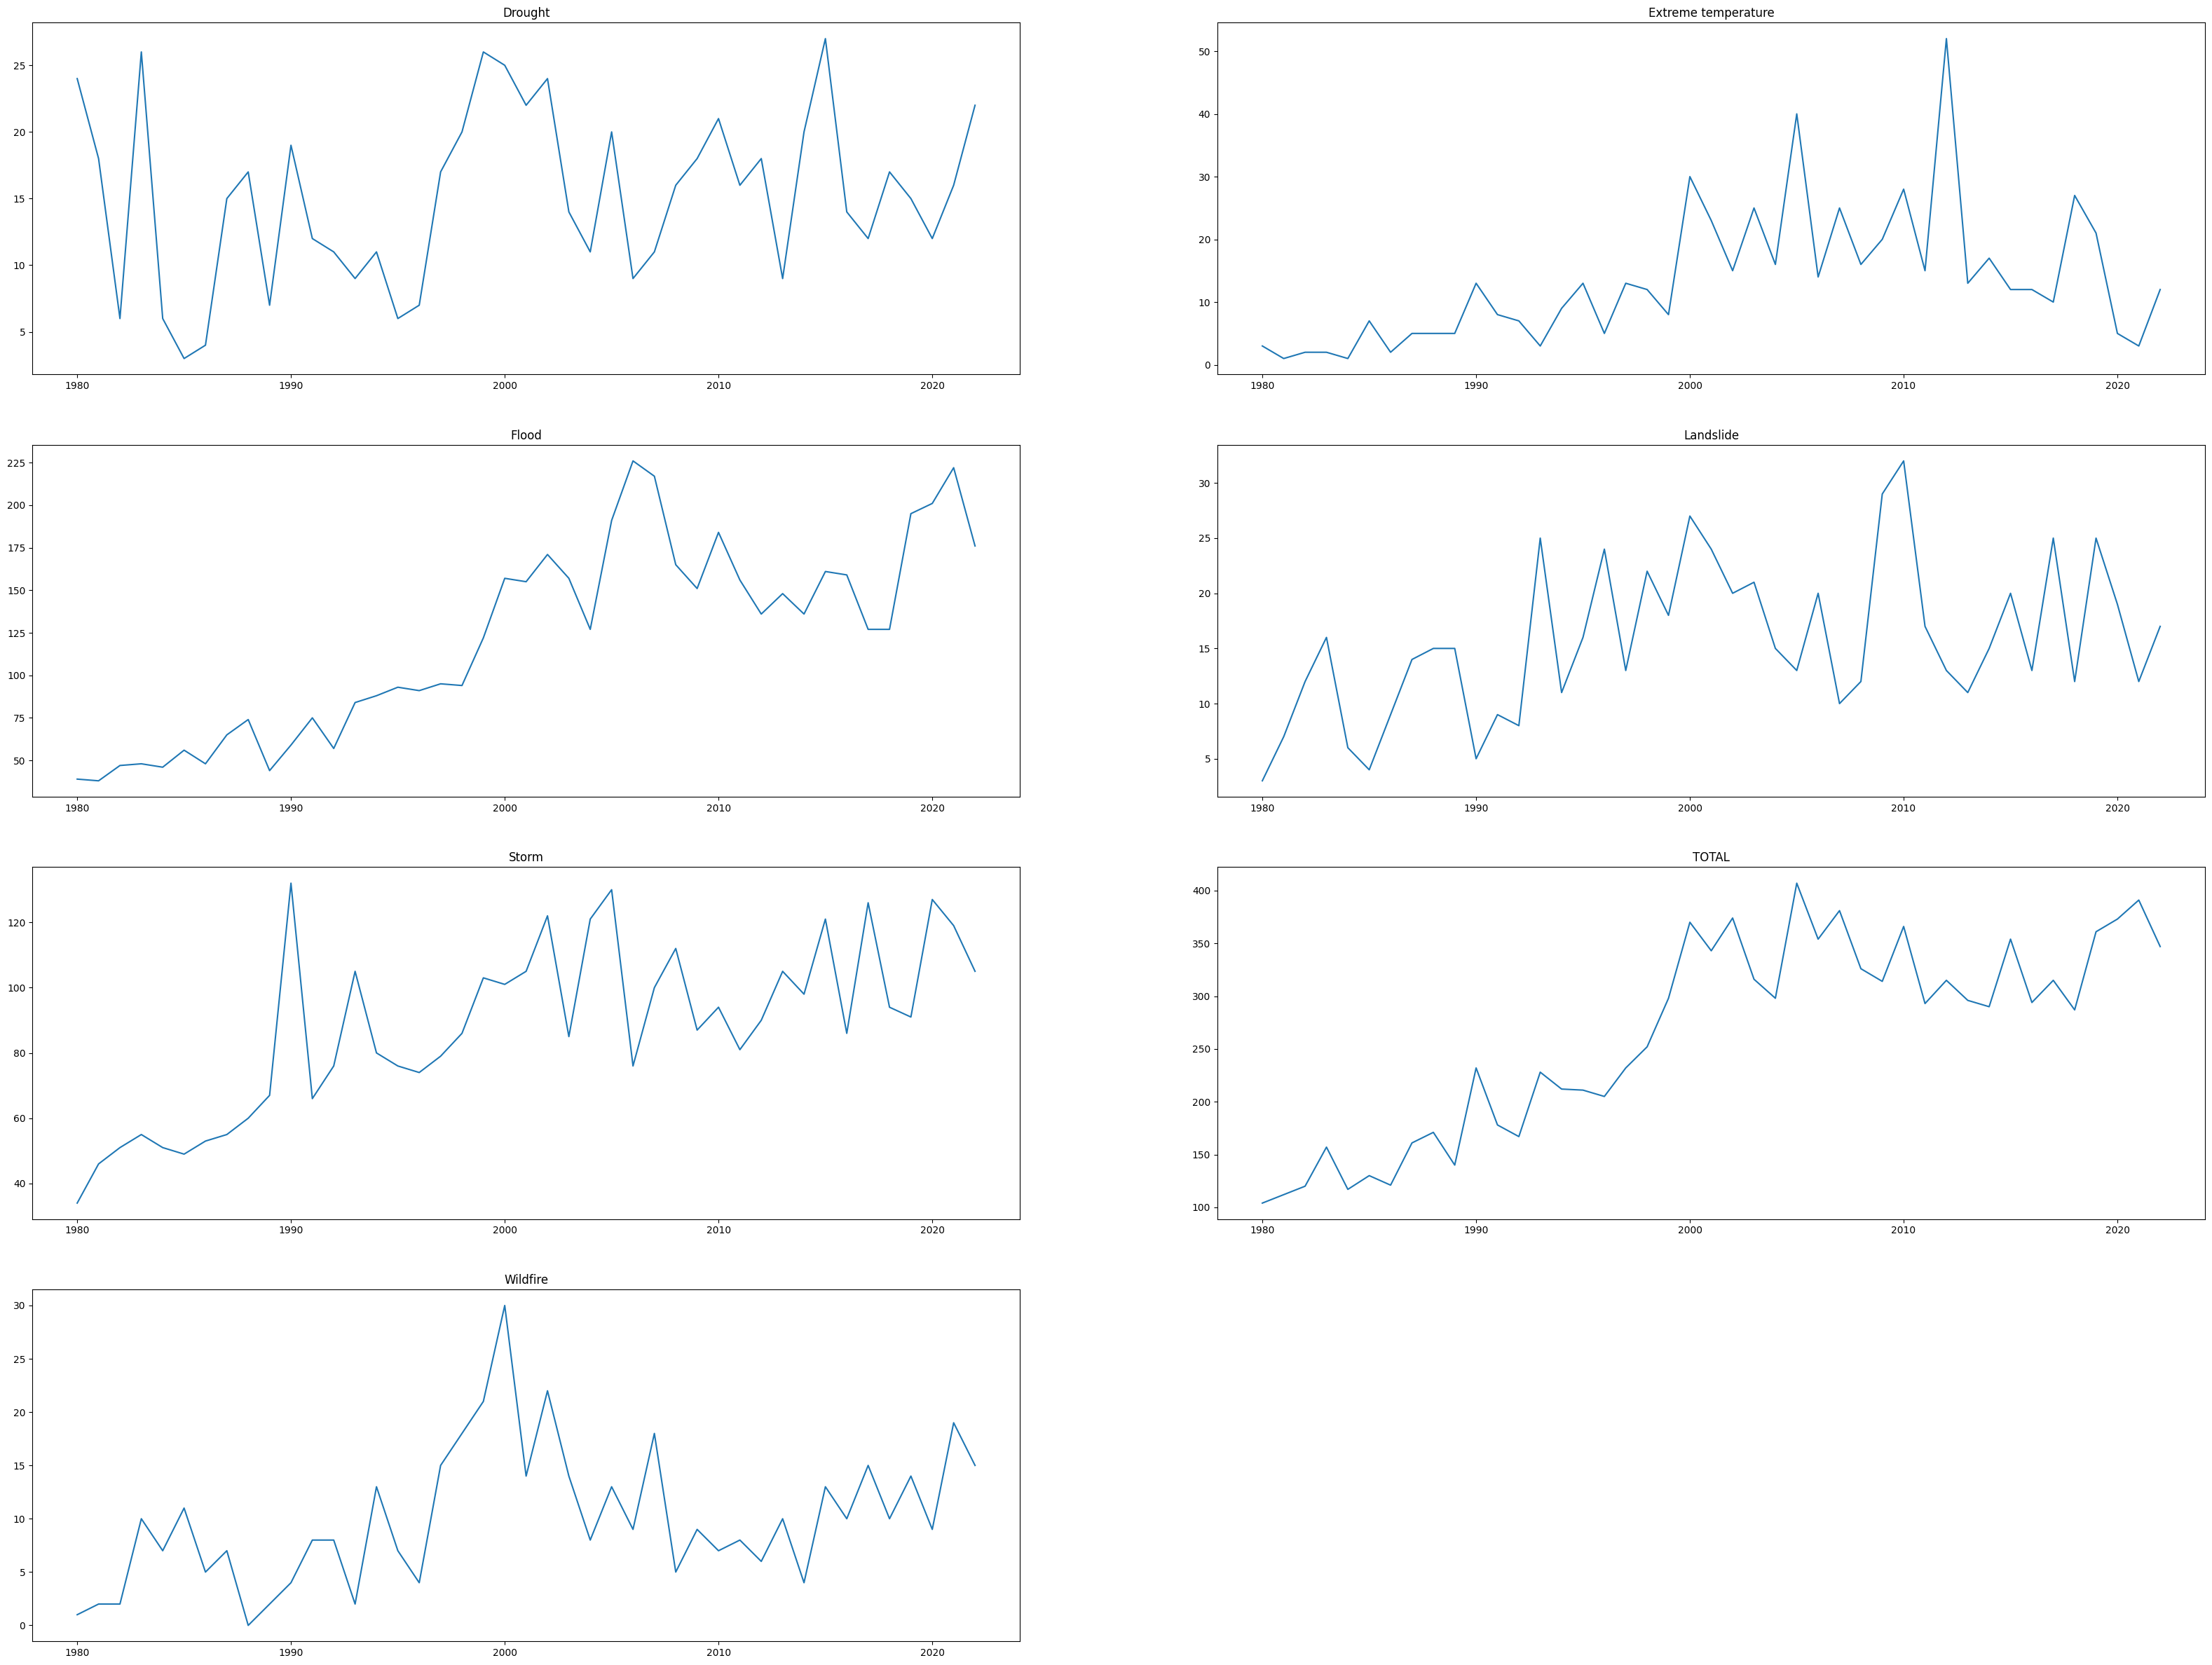

In [8]:
group_by_indicator = df.groupby('Indicator').sum()
fig,ax = plt.subplots(4,2,figsize=(40,30))
for i in range(7):
    sum_disasters = []
    for j in range(1980,2023):
        sum_disasters.append(group_by_indicator.loc[indicator[i],str(j)])
    ax.flatten()[i].plot(range(1980,2023),sum_disasters)
    ax.flatten()[i].set_title(indicator[i])
ax.flatten()[-1].set_visible(False)
plt.show()


# Total


In [9]:
total_disasters = df.loc[df['Indicator'] == 'TOTAL']
total_disasters_per_year = []
for i in range(1980,2023):
    total_disasters_per_year.append(list(total_disasters.sort_values(str(i),ascending=False).head(10)['Country']))
total_disasters_per_year_df = pd.DataFrame(total_disasters_per_year,index=range(1980,2023)).T
total_disasters_per_year_df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,India,Philippines,United States,India,United States,United States,India,"China, P.R.: Mainland",United States,United States,...,"China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland","China, P.R.: Mainland",India,United States,Indonesia,United States,United States
1,Philippines,"China, P.R.: Mainland",Philippines,United States,India,"China, P.R.: Mainland","China, P.R.: Mainland",India,"China, P.R.: Mainland",Philippines,...,United States,United States,United States,United States,United States,"China, P.R.: Mainland",Indonesia,United States,Indonesia,Colombia
2,United States,India,Indonesia,France,Brazil,India,Philippines,United States,Philippines,"China, P.R.: Mainland",...,Philippines,India,India,India,India,United States,"China, P.R.: Mainland","China, P.R.: Mainland",India,Indonesia
3,"China, P.R.: Mainland",Japan,India,Bangladesh,"China, P.R.: Mainland",Bangladesh,United States,Philippines,India,Brazil,...,Indonesia,Philippines,Philippines,Indonesia,Philippines,Indonesia,India,Vietnam,Philippines,Brazil
4,Indonesia,Indonesia,"China, P.R.: Mainland","China, P.R.: Mainland",France,Philippines,Bangladesh,Italy,Bangladesh,India,...,India,Japan,Indonesia,Philippines,Indonesia,Philippines,Pakistan,India,"China, P.R.: Mainland",Thailand
5,Vietnam,United States,France,Philippines,Sri Lanka,Brazil,Indonesia,"Iran, Islamic Rep. of",Mexico,Bangladesh,...,Vietnam,Indonesia,Japan,Haiti,Vietnam,Vietnam,France,"Afghanistan, Islamic Rep. of",Colombia,Philippines
6,Brazil,Bangladesh,Japan,Indonesia,Indonesia,Indonesia,Colombia,Indonesia,Haiti,Japan,...,Japan,France,Australia,Vietnam,Colombia,France,Japan,Brazil,Mexico,South Africa
7,"Iran, Islamic Rep. of",New Caledonia,"China, P.R.: Hong Kong",Peru,Philippines,France,Japan,Peru,Brazil,Spain,...,Brazil,Thailand,Pakistan,Pakistan,Thailand,"Afghanistan, Islamic Rep. of",Philippines,Philippines,France,Vietnam
8,Japan,Thailand,Sri Lanka,"China, P.R.: Hong Kong",Vietnam,Australia,Australia,Soviet Union (former),New Zealand,Soviet Union (former),...,"Afghanistan, Islamic Rep. of",Sri Lanka,Bangladesh,Japan,Guatemala,Japan,Spain,France,Brazil,"Venezuela, Rep. Bolivariana de"
9,"Korea, Rep. of",Soviet Union (former),Peru,Brazil,Spain,"Fiji, Rep. of",Canada,Haiti,Australia,Haiti,...,United Kingdom,Mexico,Brazil,Mexico,"Afghanistan, Islamic Rep. of",Argentina,Vietnam,Thailand,Malaysia,"Madagascar, Rep. of"


In [10]:
top_countries = set()
top_countries_count = dict()
for year in total_disasters_per_year_df.columns:
    countries = total_disasters_per_year_df[year].unique()
    for country in countries:
        if country in top_countries:
            top_countries_count[country] += 1
        else:
            top_countries.add(country)
            top_countries_count[country] = 1

In [11]:
top_countries_count = sorted(top_countries_count.items(), key=lambda x: x[1], reverse=True)

In [12]:
top_countries_count[:20]

[('United States', 43),
 ('Philippines', 42),
 ('China, P.R.: Mainland', 42),
 ('India', 41),
 ('Indonesia', 34),
 ('Bangladesh', 26),
 ('Vietnam', 20),
 ('Brazil', 18),
 ('Japan', 17),
 ('Mexico', 16),
 ('Australia', 13),
 ('Russian Federation', 13),
 ('Thailand', 11),
 ('France', 11),
 ('Afghanistan, Islamic Rep. of', 10),
 ('Pakistan', 9),
 ('Haiti', 7),
 ('Colombia', 5),
 ('China, P.R.: Hong Kong', 4),
 ('Peru', 4)]

In [13]:
world_map_code = pd.read_csv('world_map_code.csv')

In [14]:
world_map_code

,code,Country
0,ad,(Andorra))
1,ae,(United Arab Emirates)
2,af,(Afghanistan)
3,al,(Albania)
4,am,(Armenia)
...,...,...
179,ye,(Yemen)
180,yt,(Mayotte)
181,za,(South Africa)
182,zm,(Zambia)


In [15]:
map_code = []
for country in top_countries_count:
    try:
        map_code.append([list(world_map_code.loc[world_map_code['code']==country_code_dict[country[0]]]['code']),country[0],country[1]])
    except:
        print(country)

In [147]:
map_code[0][1]

'United States'

In [109]:
world_map = World()
world_map.title = 'Top 20 Disaster Prone Countries'
world_map_dict = dict()
for code,country,count in map_code[:20]:
    world_map_dict[code[0]] = count
world_map.add('Top 20 Disaster Prone Countries',world_map_dict)
world_map.render_to_file('Top_20_Disaster_Prone_Countries.svg')

In [185]:
indicator

array(['Drought', 'Extreme temperature', 'Flood', 'Landslide', 'Storm',
       'TOTAL', 'Wildfire'], dtype=object)

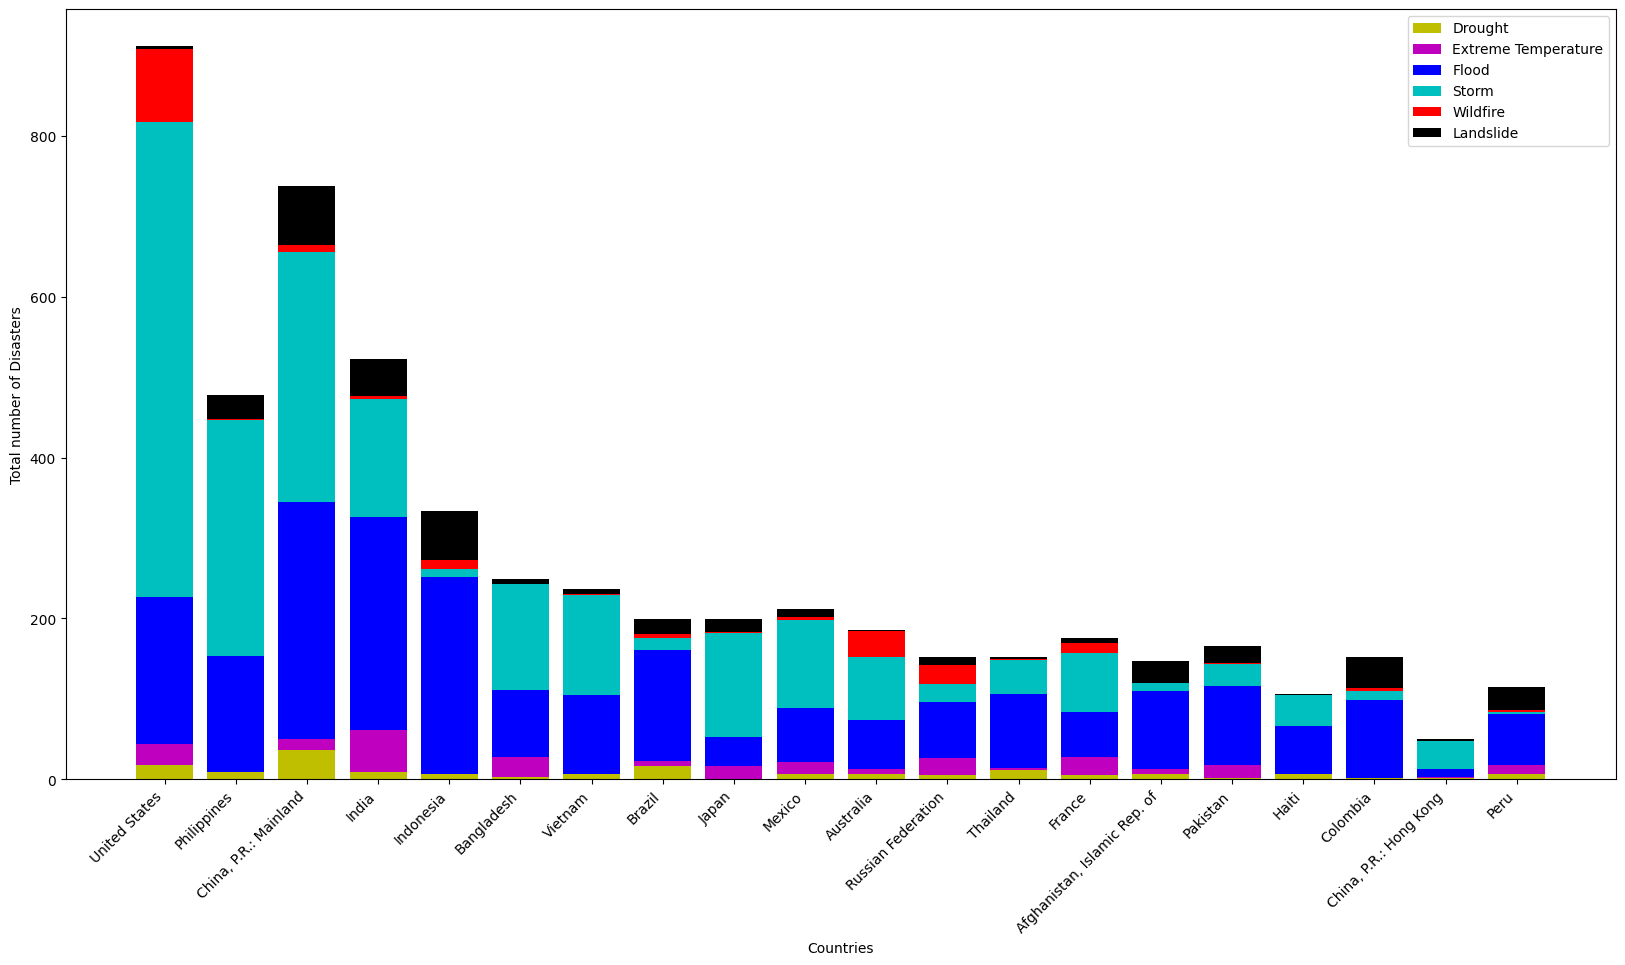

In [16]:
years = [str(year) for year in range(1980,2023)]
drought = []
ext_temp = []
flood = []
storm = []
wild_fire = []
landslide = []
countries = []
for i,country in enumerate(top_countries_count[:20]):
    try:
        drought.append(list(df.loc[df['Country'] == country[0]].loc[df['Indicator'] == 'Drought',years].sum(axis=1))[0])
    except:
        drought.append(0)
    try:
        ext_temp.append(list(df.loc[df['Country'] == country[0]].loc[df['Indicator'] == 'Extreme temperature',years].sum(axis=1))[0])
    except:
        ext_temp.append(0)
    try:
        flood.append(list(df.loc[df['Country'] == country[0]].loc[df['Indicator'] == 'Flood',years].sum(axis=1))[0])
    except:
        flood.append(0)
    try:
        storm.append(list(df.loc[df['Country'] == country[0]].loc[df['Indicator'] == 'Storm',years].sum(axis=1))[0])
    except:
        storm.append(0)
    try:
        wild_fire.append(list(df.loc[df['Country'] == country[0]].loc[df['Indicator'] == 'Wildfire',years].sum(axis=1))[0])
    except:
        wild_fire.append(0)
    try:
        landslide.append(list(df.loc[df['Country'] == country[0]].loc[df['Indicator'] == 'Landslide',years].sum(axis=1))[0])
    except:
        landslide.append(0)
    countries.append(country[0])
plt.figure(figsize=(20,10))
drought_bars = plt.bar(countries,drought,color='y')
temp_bars = plt.bar(countries,ext_temp,bottom=drought,color='m')
flood_bars = plt.bar(countries,flood,bottom=np.array(drought)+np.array(ext_temp),color='b')
storm_bars = plt.bar(countries,storm,bottom=np.array(drought)+np.array(ext_temp)+np.array(flood),color='c')
wild_fire_bars = plt.bar(countries,wild_fire,bottom=np.array(drought)+np.array(ext_temp)+np.array(flood)+np.array(storm),color='r')
landslide_bars = plt.bar(countries,landslide,bottom=np.array(drought)+np.array(ext_temp)+np.array(flood)+np.array(storm)+np.array(wild_fire),color='k')
plt.legend(['Drought','Extreme Temperature','Flood','Storm','Wildfire','Landslide'])
plt.xlabel('Countries')
plt.ylabel('Total number of Disasters')
plt.xticks(rotation=45, ha='right')
plt.show()

# Drought


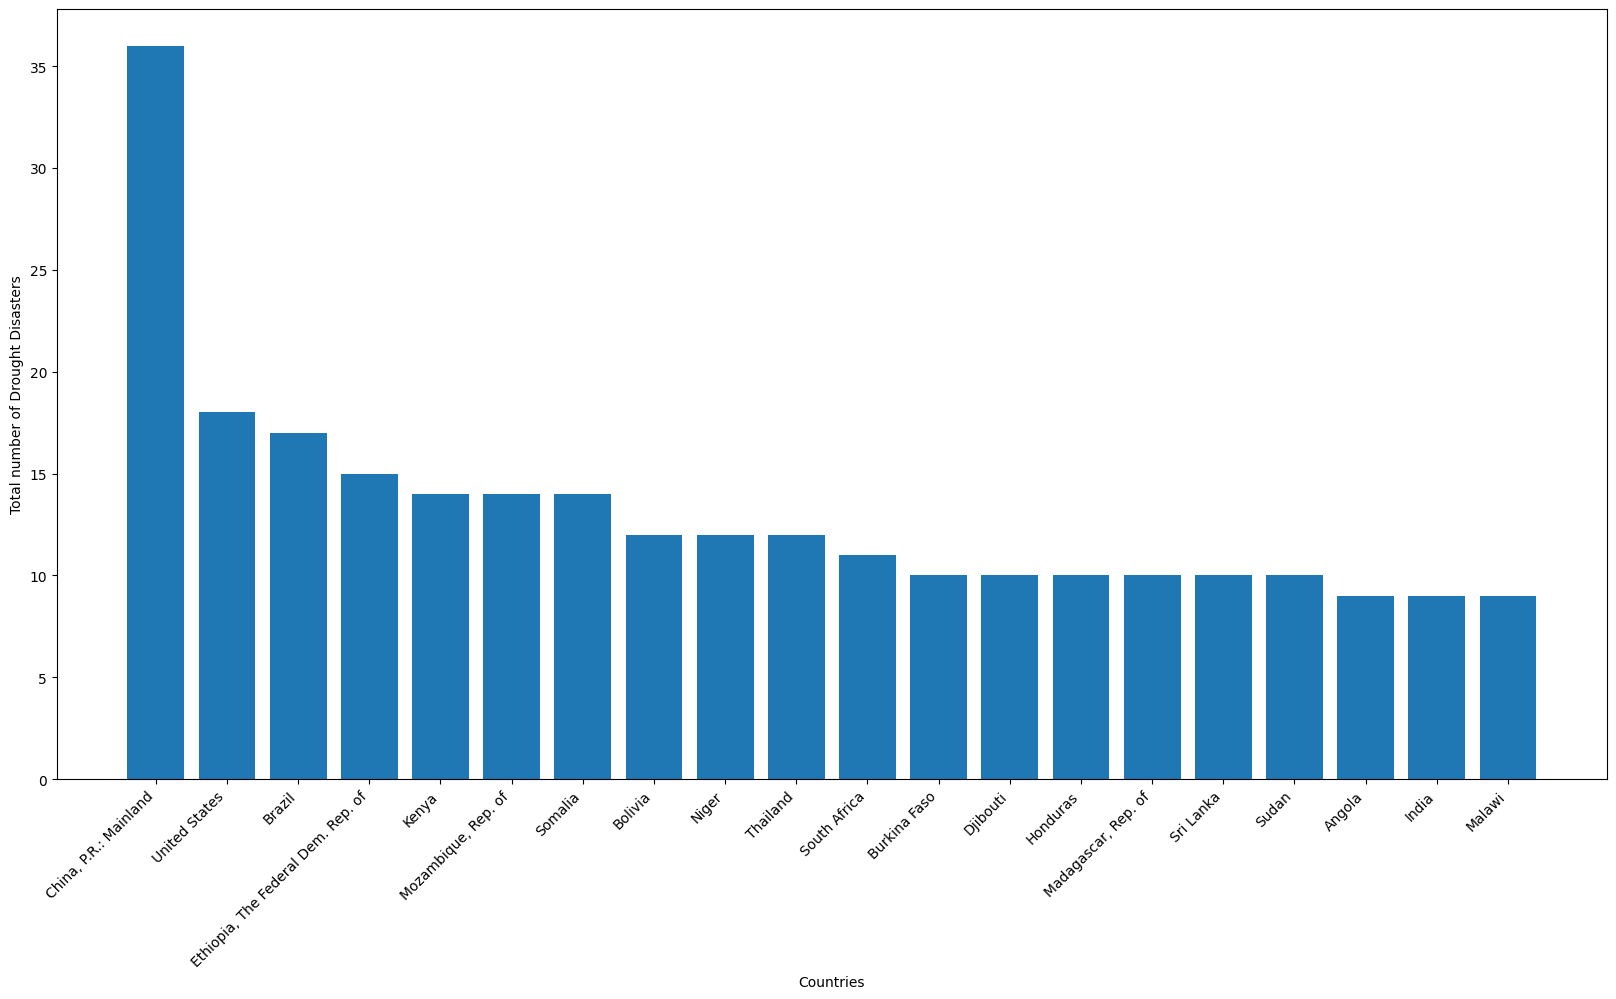

In [17]:
years = [str(year) for year in range(1980,2023)]
drought = []
countries = []
for i,country in enumerate(list(df['Country'].unique())):
    try:
        drought.append(list(df.loc[df['Country'] == country].loc[df['Indicator'] == 'Drought',years].sum(axis=1))[0])
    except:
        drought.append(0)
    countries.append(country)
zipped = list(zip(countries,drought))
zipped.sort(key=lambda x: x[1],reverse=True)
countries,drought = zip(*zipped)
plt.figure(figsize=(20,10))
drought_bars = plt.bar(countries[:20],drought[:20])
plt.xlabel('Countries')
plt.ylabel('Total number of Drought Disasters')
plt.xticks(rotation=45, ha='right')
plt.show()

In [138]:
top_countries_count = [(countries[i],drought[i]) for i in range(20)]

In [139]:
top_countries_count

[('China, P.R.: Mainland', 36.0),
 ('United States', 18.0),
 ('Brazil', 17.0),
 ('Ethiopia, The Federal Dem. Rep. of', 15.0),
 ('Kenya', 14.0),
 ('Mozambique, Rep. of', 14.0),
 ('Somalia', 14.0),
 ('Bolivia', 12.0),
 ('Niger', 12.0),
 ('Thailand', 12.0),
 ('South Africa', 11.0),
 ('Burkina Faso', 10.0),
 ('Djibouti', 10.0),
 ('Honduras', 10.0),
 ('Madagascar, Rep. of', 10.0),
 ('Sri Lanka', 10.0),
 ('Sudan', 10.0),
 ('Angola', 9.0),
 ('India', 9.0),
 ('Malawi', 9.0)]

In [140]:
map_code = []
for country in top_countries_count:
    try:
        map_code.append([list(world_map_code.loc[world_map_code['code']==country_code_dict[country[0]]]['code']),country[0],country[1]])
    except:
        print(country)

In [141]:
world_map = World()
world_map.title = 'Top 20 Drought Countries'
world_map_dict = dict()
for code,country,count in map_code[:20]:
    try:
        world_map_dict[code[0]] = count
    except:
        print(code)
world_map.add('Top 20 Drought Countries',world_map_dict)
world_map.render_to_file('Top 20 Drought Countries.svg')

# Extreme Temperature

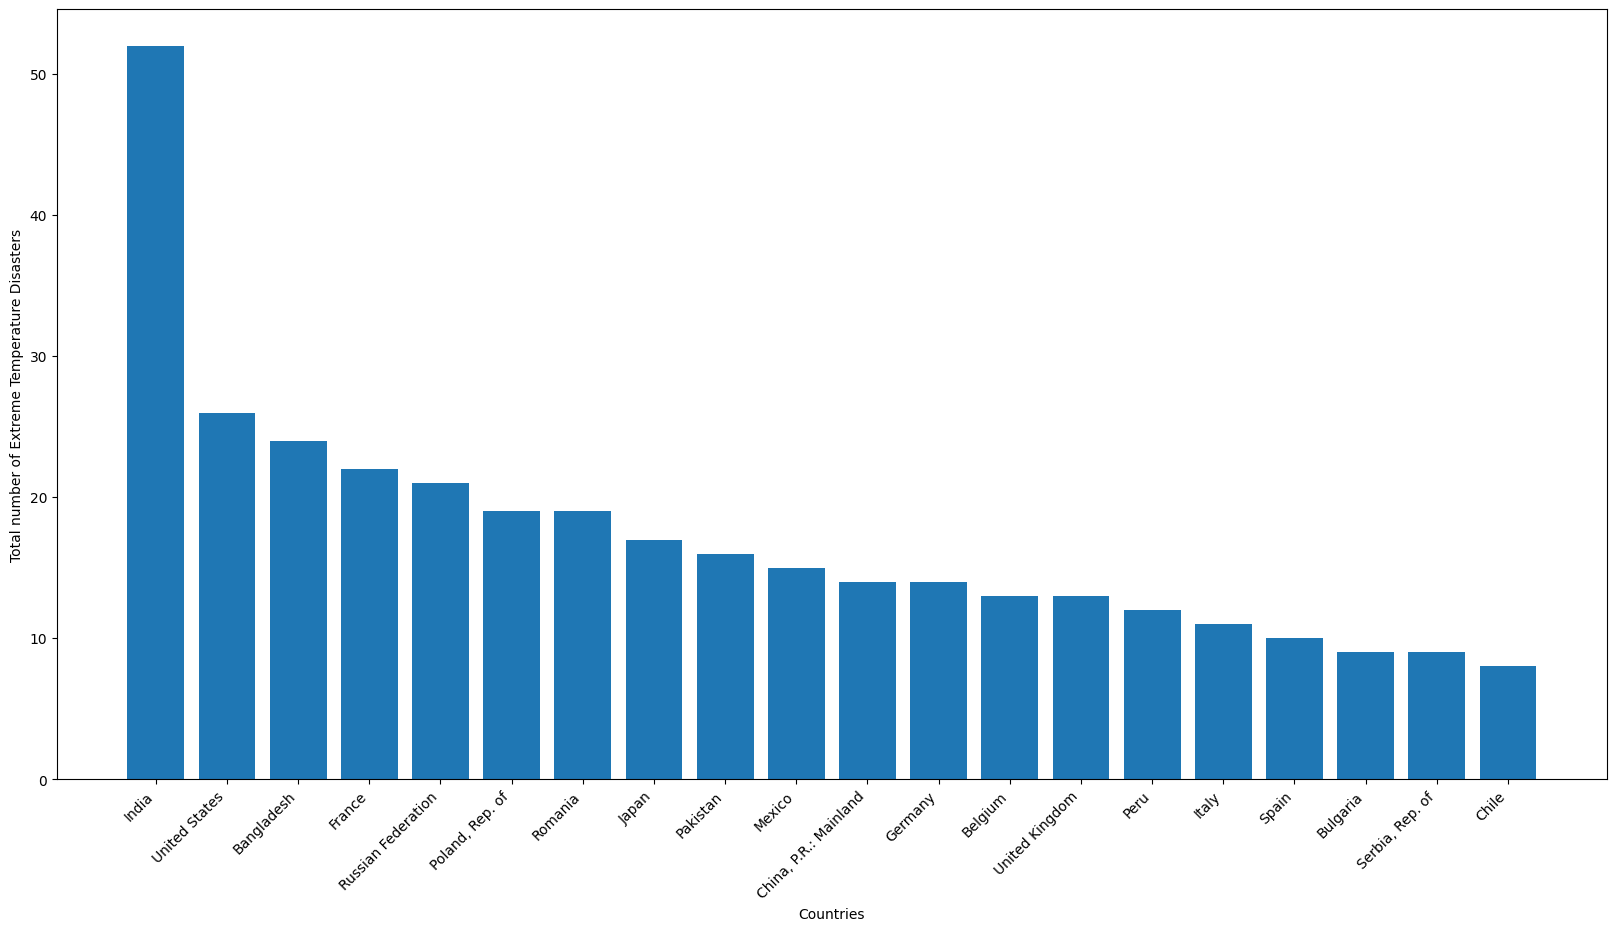

In [18]:
years = [str(year) for year in range(1980,2023)]
ext_temp = []
countries = []
for i,country in enumerate(list(df['Country'].unique())):
    try:
        ext_temp.append(list(df.loc[df['Country'] == country].loc[df['Indicator'] == 'Extreme temperature',years].sum(axis=1))[0])
    except:
        ext_temp.append(0)
    countries.append(country)
zipped = list(zip(countries,ext_temp))
zipped.sort(key=lambda x: x[1],reverse=True)
countries,ext_temp = zip(*zipped)
plt.figure(figsize=(20,10))
ext_temp_bars = plt.bar(countries[:20],ext_temp[:20])
plt.xlabel('Countries')
plt.ylabel('Total number of Extreme Temperature Disasters')
plt.xticks(rotation=45, ha='right')
plt.show()

In [162]:
top_countries_count = [(countries[i],ext_temp[i]) for i in range(20)]
top_countries_count

[('India', 52.0),
 ('United States', 26.0),
 ('Bangladesh', 24.0),
 ('France', 22.0),
 ('Russian Federation', 21.0),
 ('Poland, Rep. of', 19.0),
 ('Romania', 19.0),
 ('Japan', 17.0),
 ('Pakistan', 16.0),
 ('Mexico', 15.0),
 ('China, P.R.: Mainland', 14.0),
 ('Germany', 14.0),
 ('Belgium', 13.0),
 ('United Kingdom', 13.0),
 ('Peru', 12.0),
 ('Italy', 11.0),
 ('Spain', 10.0),
 ('Bulgaria', 9.0),
 ('Serbia, Rep. of', 9.0),
 ('Chile', 8.0)]

In [163]:
map_code = []
for country in top_countries_count:
    try:
        map_code.append([list(world_map_code.loc[world_map_code['code']==country_code_dict[country[0]]]['code']),country[0],country[1]])
    except:
        print(country)

In [164]:
world_map = World()
world_map.title = 'Top 20 Extreme Temperature Countries'
world_map_dict = dict()
for code,country,count in map_code[:20]:
    try:
        world_map_dict[code[0]] = count
    except:
        print(code)
world_map.add('Top 20 Extreme Temperature Countries',world_map_dict)
world_map.render_to_file('Top 20 Extreme Temperature Countries.svg')

# Flood

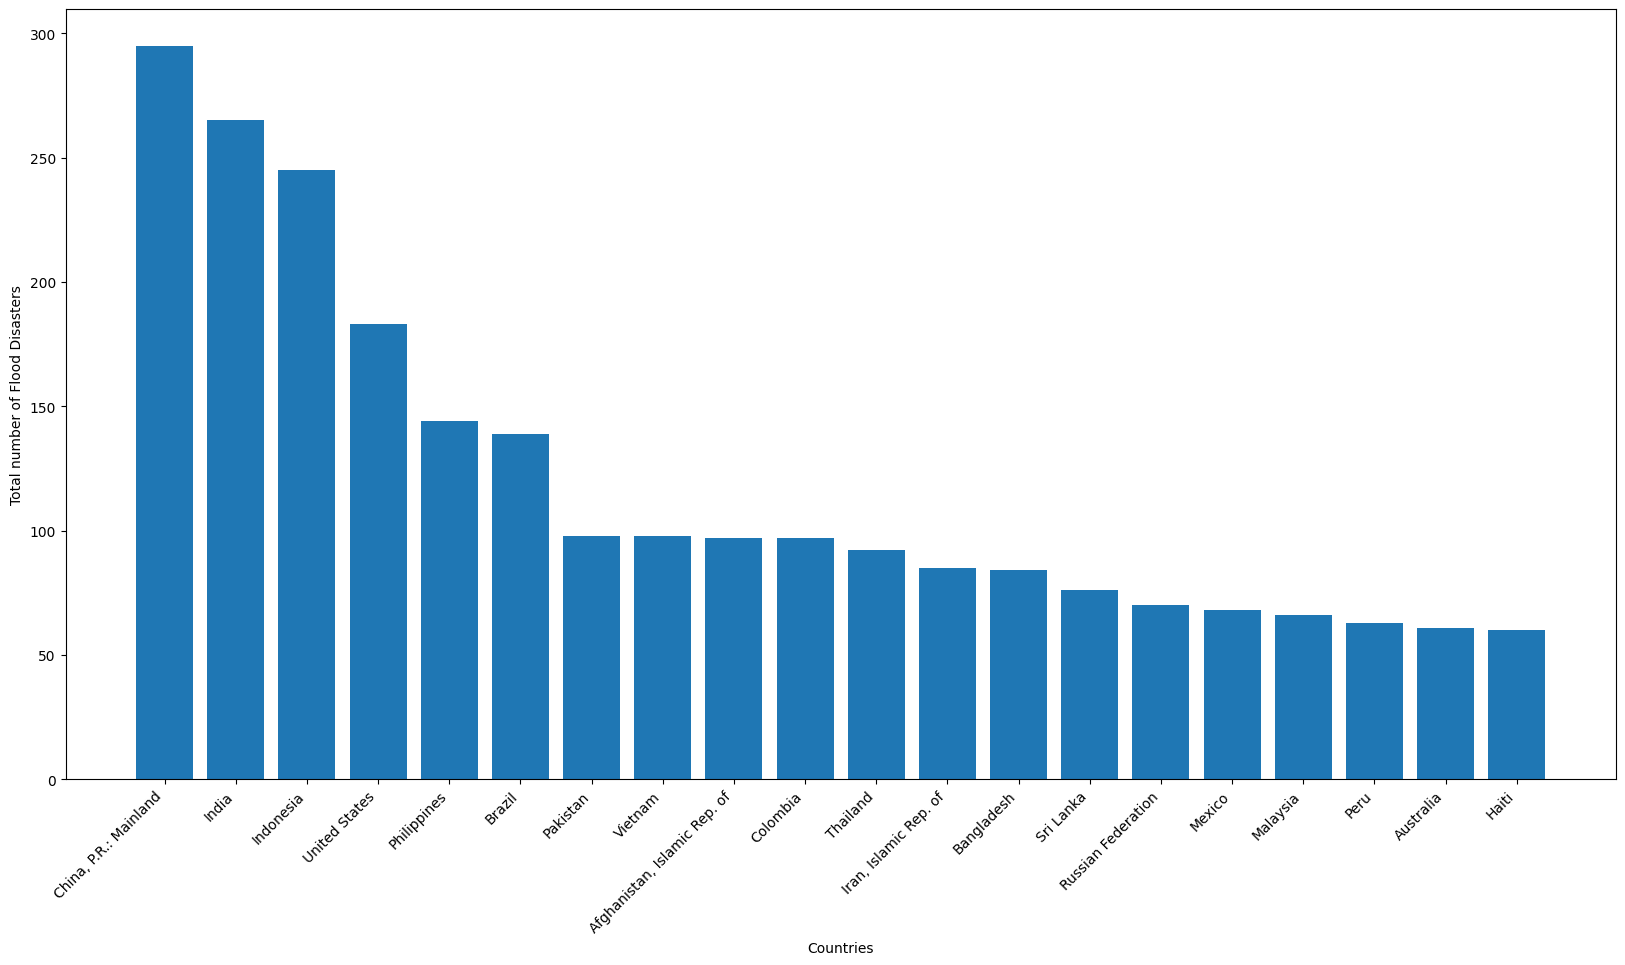

In [19]:
years = [str(year) for year in range(1980,2023)]
flood = []
countries = []
for i,country in enumerate(list(df['Country'].unique())):
    try:
        flood.append(list(df.loc[df['Country'] == country].loc[df['Indicator'] == 'Flood',years].sum(axis=1))[0])
    except:
        flood.append(0)
    countries.append(country)
zipped = list(zip(countries,flood))
zipped.sort(key=lambda x: x[1],reverse=True)
countries,flood = zip(*zipped)
plt.figure(figsize=(20,10))
flood_bars = plt.bar(countries[:20],flood[:20])
plt.xlabel('Countries')
plt.ylabel('Total number of Flood Disasters')
plt.xticks(rotation=45, ha='right')
plt.show()

In [156]:
top_countries_count = [(countries[i],flood[i]) for i in range(20)]
top_countries_count

[('China, P.R.: Mainland', 295.0),
 ('India', 265.0),
 ('Indonesia', 245.0),
 ('United States', 183.0),
 ('Philippines', 144.0),
 ('Brazil', 139.0),
 ('Pakistan', 98.0),
 ('Vietnam', 98.0),
 ('Afghanistan, Islamic Rep. of', 97.0),
 ('Colombia', 97.0),
 ('Thailand', 92.0),
 ('Iran, Islamic Rep. of', 85.0),
 ('Bangladesh', 84.0),
 ('Sri Lanka', 76.0),
 ('Russian Federation', 70.0),
 ('Mexico', 68.0),
 ('Malaysia', 66.0),
 ('Peru', 63.0),
 ('Australia', 61.0),
 ('Haiti', 60.0)]

In [158]:
map_code = []
for country in top_countries_count:
    try:
        map_code.append([list(world_map_code.loc[world_map_code['code']==country_code_dict[country[0]]]['code']),country[0],country[1]])
    except:
        print(country)

In [159]:
world_map = World()
world_map.title = 'Top 20 Flood Countries'
world_map_dict = dict()
for code,country,count in map_code[:20]:
    try:
        world_map_dict[code[0]] = count
    except:
        print(code)
world_map.add('Top 20 Flood Countries',world_map_dict)
world_map.render_to_file('Top 20 Flood Countries.svg')

# Storm

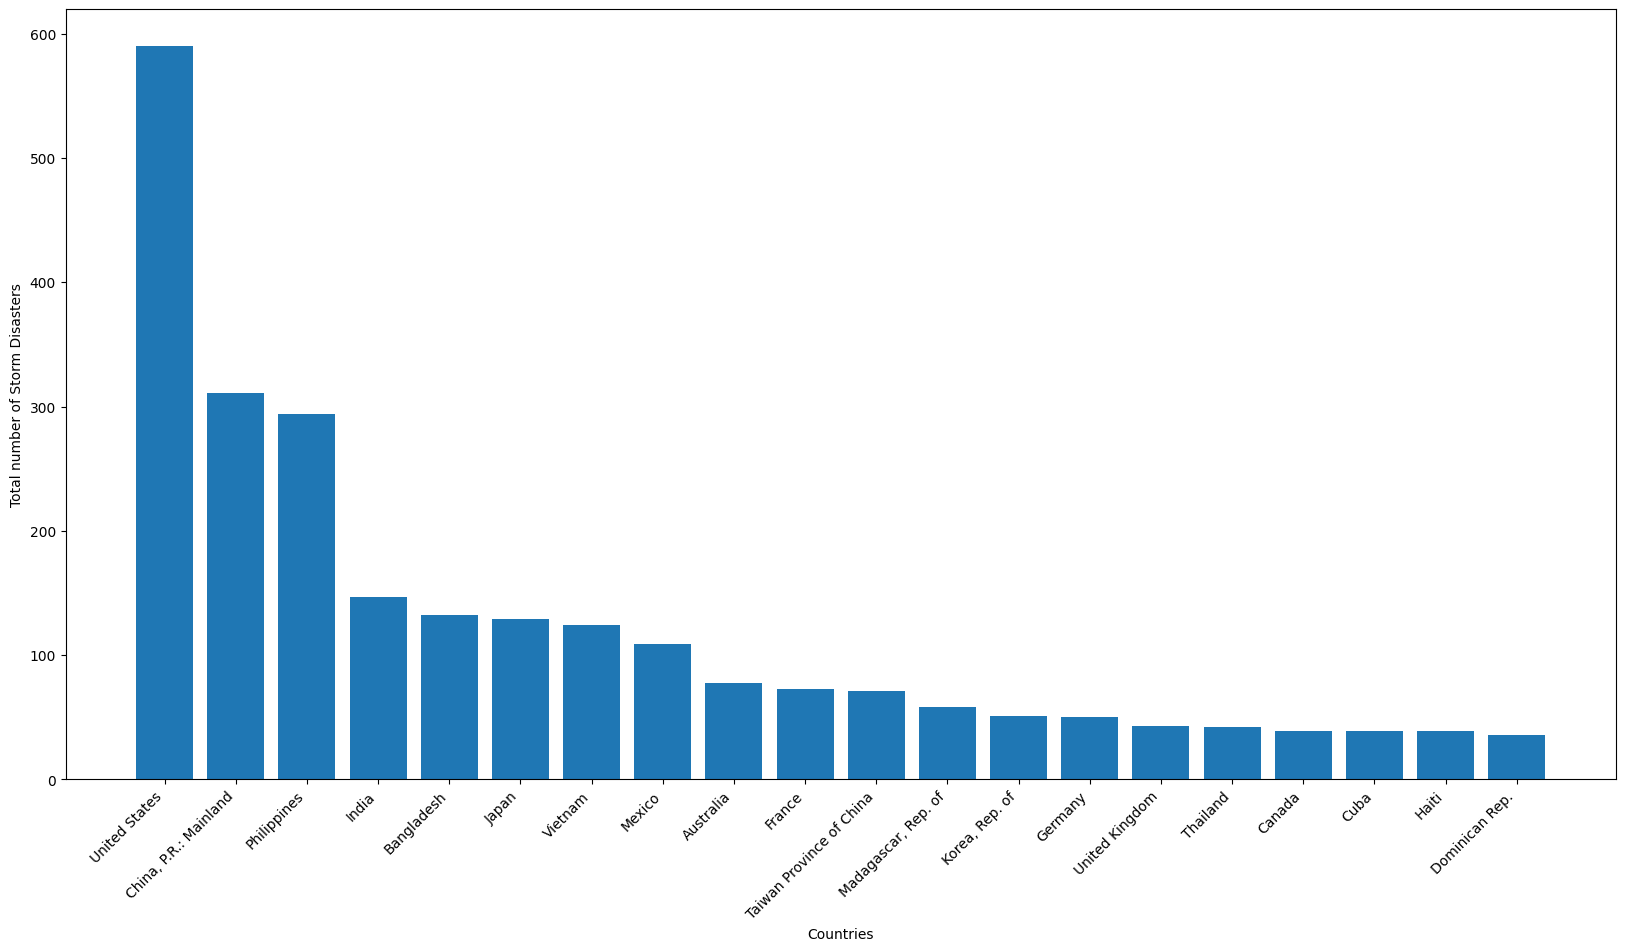

In [20]:
years = [str(year) for year in range(1980,2023)]
storm = []
countries = []
for i,country in enumerate(list(df['Country'].unique())):
    try:
        storm.append(list(df.loc[df['Country'] == country].loc[df['Indicator'] == 'Storm',years].sum(axis=1))[0])
    except:
        storm.append(0)
    countries.append(country)
zipped = list(zip(countries,storm))
zipped.sort(key=lambda x: x[1],reverse=True)
countries,storm = zip(*zipped)
plt.figure(figsize=(20,10))
storm_bars = plt.bar(countries[:20],storm[:20])
plt.xlabel('Countries')
plt.ylabel('Total number of Storm Disasters')
plt.xticks(rotation=45, ha='right')
plt.show()

In [166]:
top_countries_count = [(countries[i],storm[i]) for i in range(20)]
top_countries_count

[('United States', 590.0),
 ('China, P.R.: Mainland', 311.0),
 ('Philippines', 294.0),
 ('India', 147.0),
 ('Bangladesh', 132.0),
 ('Japan', 129.0),
 ('Vietnam', 124.0),
 ('Mexico', 109.0),
 ('Australia', 78.0),
 ('France', 73.0),
 ('Taiwan Province of China', 71.0),
 ('Madagascar, Rep. of', 58.0),
 ('Korea, Rep. of', 51.0),
 ('Germany', 50.0),
 ('United Kingdom', 43.0),
 ('Thailand', 42.0),
 ('Canada', 39.0),
 ('Cuba', 39.0),
 ('Haiti', 39.0),
 ('Dominican Rep.', 36.0)]

In [167]:
map_code = []
for country in top_countries_count:
    try:
        map_code.append([list(world_map_code.loc[world_map_code['code']==country_code_dict[country[0]]]['code']),country[0],country[1]])
    except:
        print(country)

In [168]:
world_map = World()
world_map.title = 'Top 20 Storm Countries'
world_map_dict = dict()
for code,country,count in map_code[:20]:
    try:
        world_map_dict[code[0]] = count
    except:
        print(code)
world_map.add('Top 20 Storm Countries',world_map_dict)
world_map.render_to_file('Top 20 Storm Countries.svg')

# Wild Fire

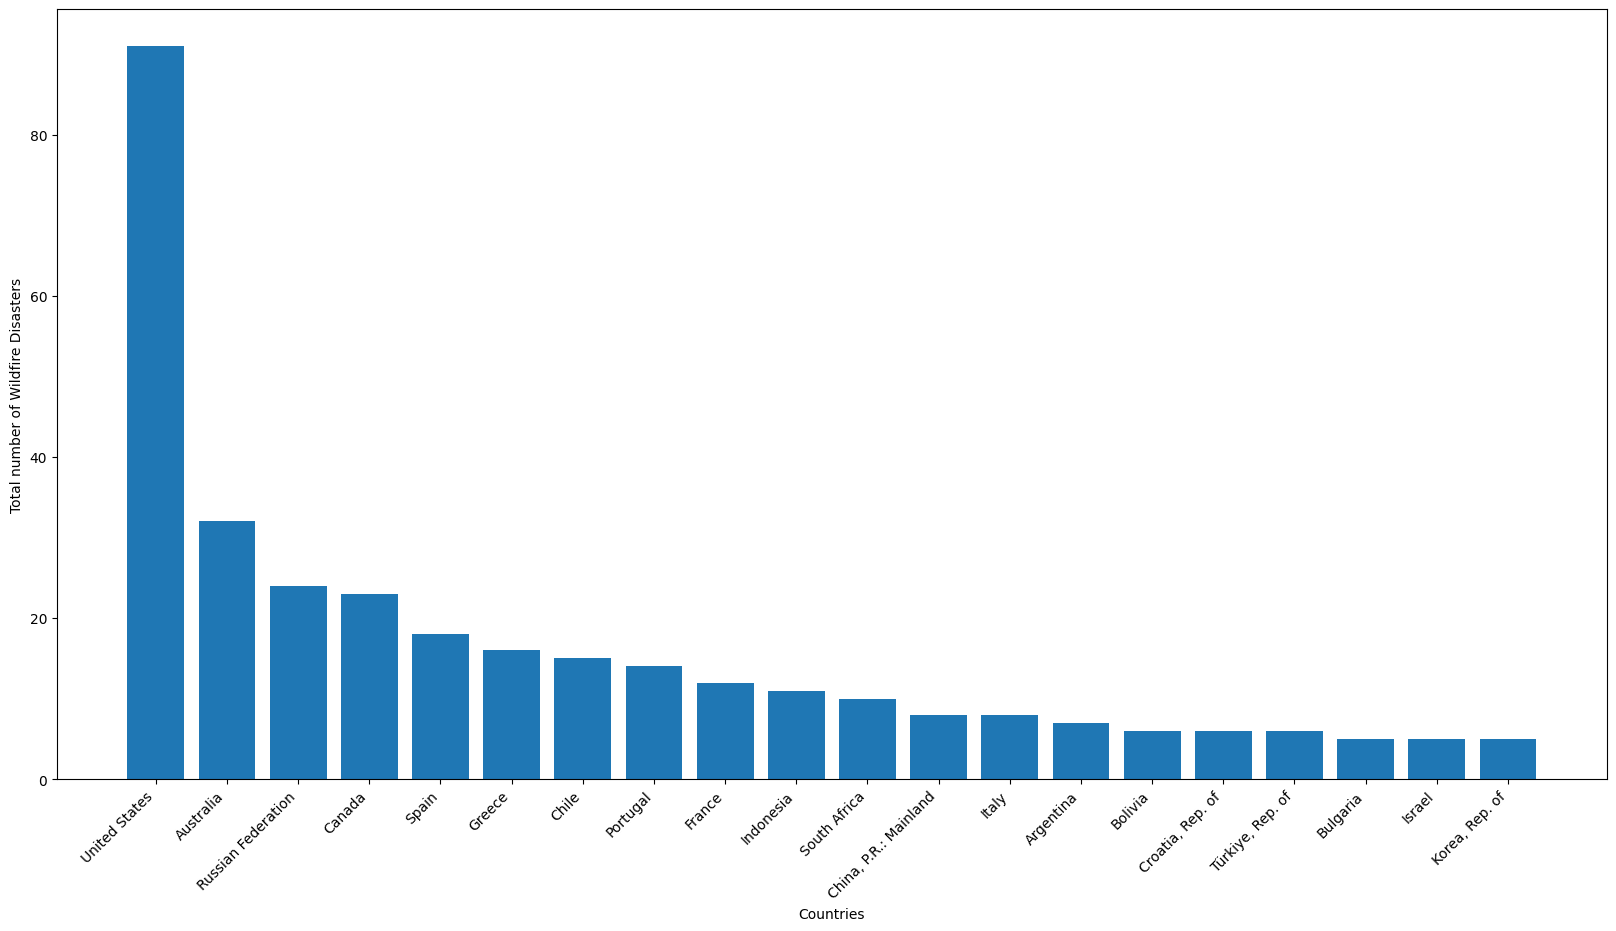

In [21]:
years = [str(year) for year in range(1980,2023)]
wild_fire = []
countries = []
for i,country in enumerate(list(df['Country'].unique())):
    try:
        wild_fire.append(list(df.loc[df['Country'] == country].loc[df['Indicator'] == 'Wildfire',years].sum(axis=1))[0])
    except:
        wild_fire.append(0)
    countries.append(country)
zipped = list(zip(countries,wild_fire))
zipped.sort(key=lambda x: x[1],reverse=True)
countries,wild_fire = zip(*zipped)
plt.figure(figsize=(20,10))
wild_fire_bars = plt.bar(countries[:20],wild_fire[:20])
plt.xlabel('Countries')
plt.ylabel('Total number of Wildfire Disasters')
plt.xticks(rotation=45, ha='right')
plt.show()

In [172]:
top_countries_count = [(countries[i],wild_fire[i]) for i in range(20)]
top_countries_count 

[('United States', 91.0),
 ('Australia', 32.0),
 ('Russian Federation', 24.0),
 ('Canada', 23.0),
 ('Spain', 18.0),
 ('Greece', 16.0),
 ('Chile', 15.0),
 ('Portugal', 14.0),
 ('France', 12.0),
 ('Indonesia', 11.0),
 ('South Africa', 10.0),
 ('China, P.R.: Mainland', 8.0),
 ('Italy', 8.0),
 ('Argentina', 7.0),
 ('Bolivia', 6.0),
 ('Croatia, Rep. of', 6.0),
 ('Türkiye, Rep. of', 6.0),
 ('Bulgaria', 5.0),
 ('Israel', 5.0),
 ('Korea, Rep. of', 5.0)]

In [173]:
map_code = []
for country in top_countries_count:
    try:
        map_code.append([list(world_map_code.loc[world_map_code['code']==country_code_dict[country[0]]]['code']),country[0],country[1]])
    except:
        print(country)

In [174]:
world_map = World()
world_map.title = 'Top 20 Wildfire Countries'
world_map_dict = dict()
for code,country,count in map_code[:20]:
    try:
        world_map_dict[code[0]] = count
    except:
        print(code)
world_map.add('Top 20 Wildfire Countries',world_map_dict)
world_map.render_to_file('Top 20 Wildfire Countries.svg')

# Land Slide

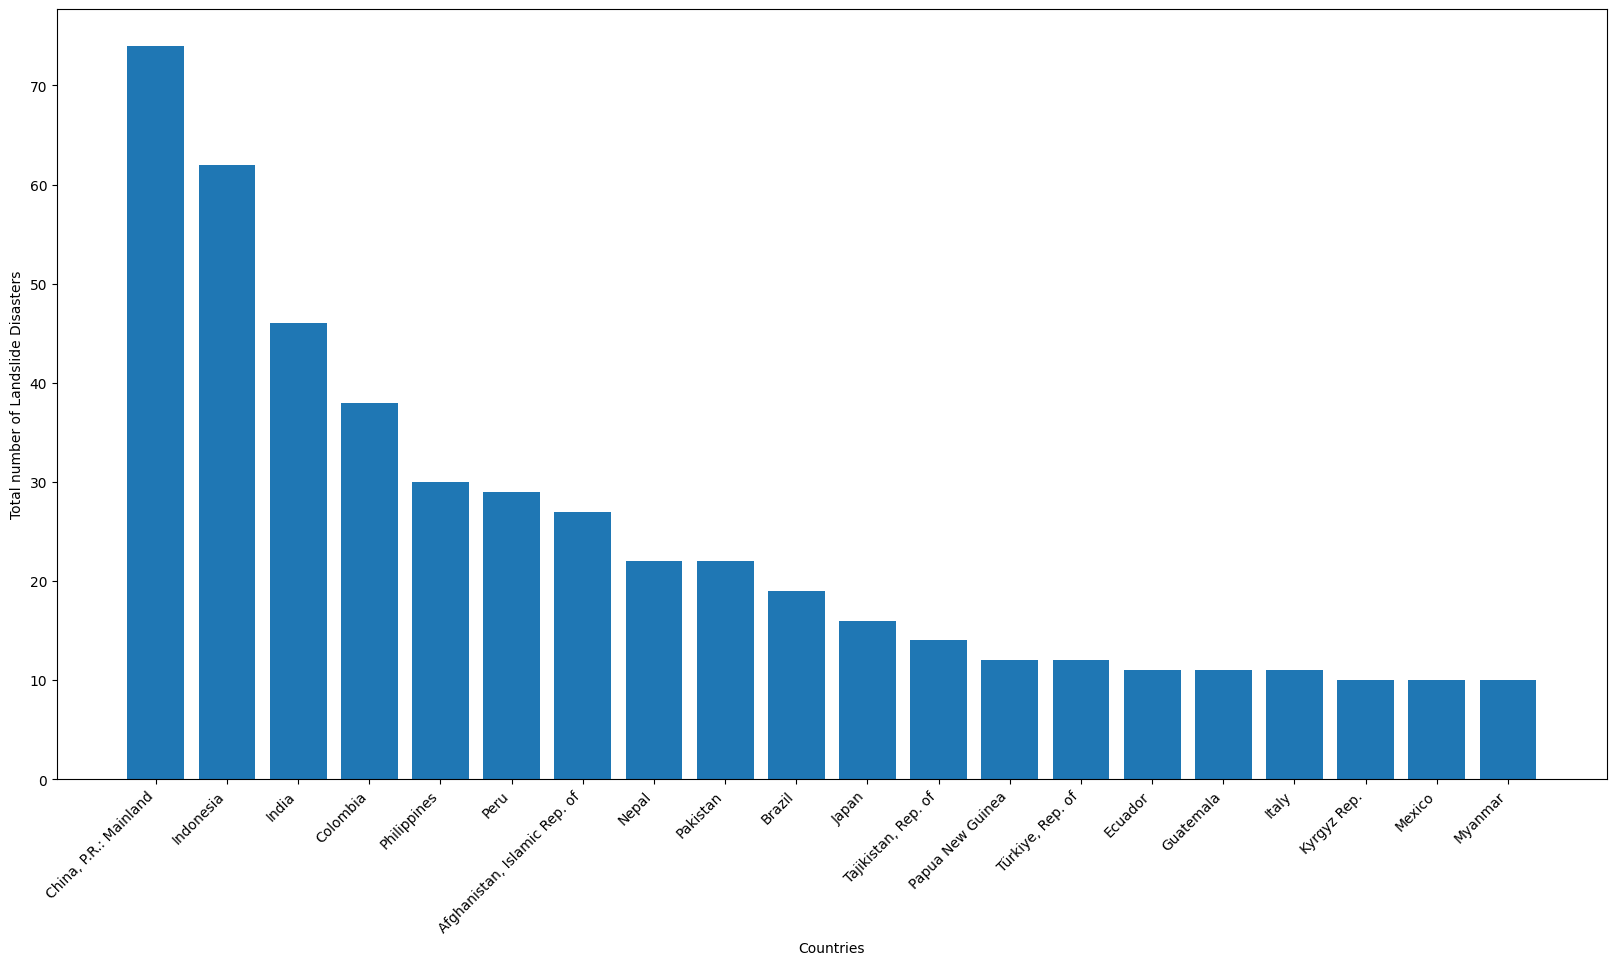

In [22]:
years = [str(year) for year in range(1980,2023)]
landslide= []
countries = []
for i,country in enumerate(list(df['Country'].unique())):
    try:
        landslide.append(list(df.loc[df['Country'] == country].loc[df['Indicator'] == 'Landslide',years].sum(axis=1))[0])
    except:
        landslide.append(0)
    countries.append(country)
zipped = list(zip(countries,landslide))
zipped.sort(key=lambda x: x[1],reverse=True)
countries,landslide = zip(*zipped)
plt.figure(figsize=(20,10))
landslide_bars = plt.bar(countries[:20],landslide[:20])
plt.xlabel('Countries')
plt.ylabel('Total number of Landslide Disasters')
plt.xticks(rotation=45, ha='right')
plt.show()

In [177]:
top_countries_count = [(countries[i],landslide[i]) for i in range(20)]
top_countries_count

[('China, P.R.: Mainland', 74.0),
 ('Indonesia', 62.0),
 ('India', 46.0),
 ('Colombia', 38.0),
 ('Philippines', 30.0),
 ('Peru', 29.0),
 ('Afghanistan, Islamic Rep. of', 27.0),
 ('Nepal', 22.0),
 ('Pakistan', 22.0),
 ('Brazil', 19.0),
 ('Japan', 16.0),
 ('Tajikistan, Rep. of', 14.0),
 ('Papua New Guinea', 12.0),
 ('Türkiye, Rep. of', 12.0),
 ('Ecuador', 11.0),
 ('Guatemala', 11.0),
 ('Italy', 11.0),
 ('Kyrgyz Rep.', 10.0),
 ('Mexico', 10.0),
 ('Myanmar', 10.0)]

In [178]:
map_code = []
for country in top_countries_count:
    try:
        map_code.append([list(world_map_code.loc[world_map_code['code']==country_code_dict[country[0]]]['code']),country[0],country[1]])
    except:
        print(country)

In [179]:
world_map = World()
world_map.title = 'Top 20 Landslide Countries'
world_map_dict = dict()
for code,country,count in map_code[:20]:
    try:
        world_map_dict[code[0]] = count
    except:
        print(code)
world_map.add('Top 20 Landslide Countries',world_map_dict)
world_map.render_to_file('Top 20 Landslide Countries.svg')

# VIET NAM

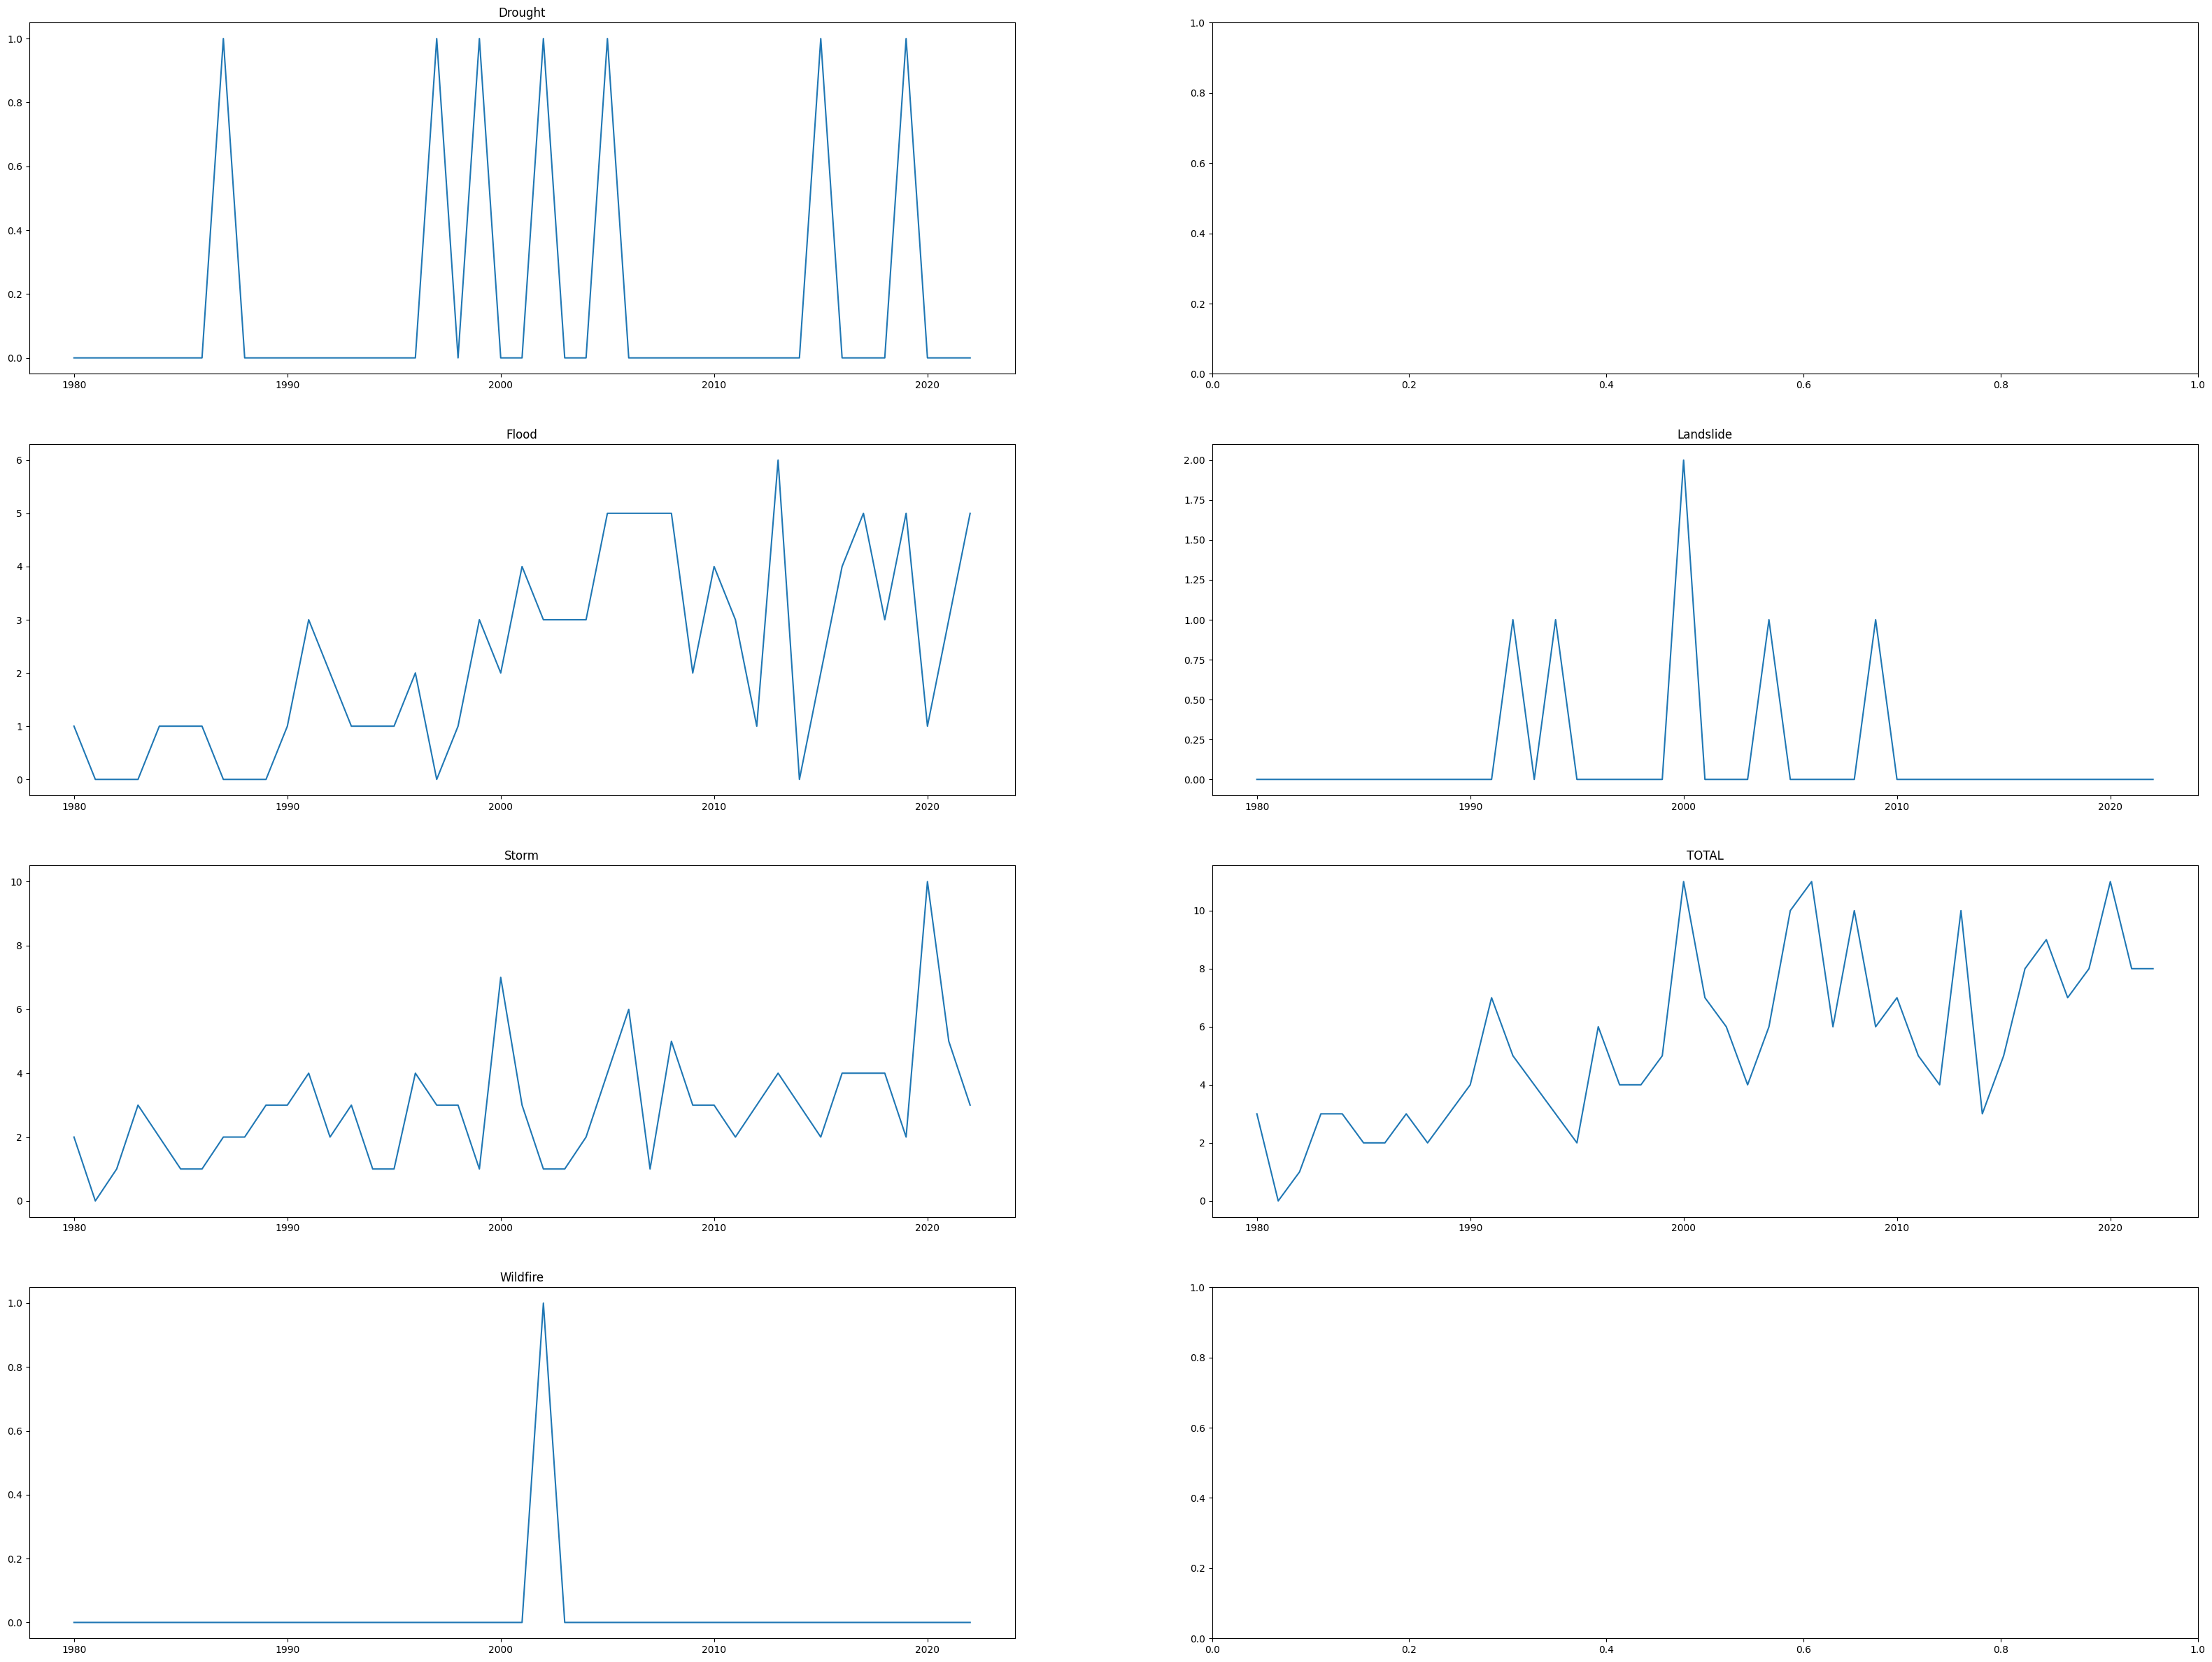

In [197]:
group_by_indicator = df.loc[df['Country']=='Vietnam'].groupby('Indicator').sum()
fig,ax = plt.subplots(4,2,figsize=(40,30))
for i in range(7):
    try:
        sum_disasters = []
        for j in range(1980,2023):
            sum_disasters.append(group_by_indicator.loc[indicator[i],str(j)])
        ax.flatten()[i].plot(range(1980,2023),sum_disasters)
        ax.flatten()[i].set_title(indicator[i])
    except:
        pass
# ax.flatten()[-1].set_visible(False)
plt.show()

